# Getting Started with OpenCV


# Installation

There are many ways to install OpenCV including installing from the source, installing via pip, and installing via apt. The best way to install OpenCV is using pip. You must have pip installed. You should run the command via CMD or Terminal (It may need to be run as an administrator):

These packages are installed in Colab. Now you can import cv2 and print its version:

Note that we can use skimage alongside OpenCV. Skimage is another good pythonic library for image processing. You can install skimage via pip:

In [20]:
! pip install opencv-python numpy scikit-image imageio[pyav]

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.8 MB 1.4 MB/s eta 0:00:19
    --------------------------------------- 0.5/25.8 MB 6.0 MB/s eta 0:00:05
   - -------------------------------------- 1.1/25.8 MB 10.2 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/25.8 MB 14.7 MB/s eta 0:00:02
   ----- ---------------------------------- 3.6/25.8 MB 19.4 MB/s eta 0:00:02
   -------- ------------------------------- 5.3/25.8 MB 22.8 MB/s eta 0:00:01
   ----------- ---------------------------- 7.5/25.8 MB 26.6 MB/s eta 0:00:01
   ------------- -------------------------- 8.7/25.8 MB 26.6 MB/s eta 0:00:01
   ----------------- ---------------------- 11.3/25.8 MB 40.9 MB/s eta 0:00:01
   ----------------------- ---------------- 14.8/25.8 MB 59.5 MB/s eta 0:00:01
   ----------------------------- ---------- 18.8/25.8 MB 72.6 MB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt

print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.10.0


# Getting Started with Images

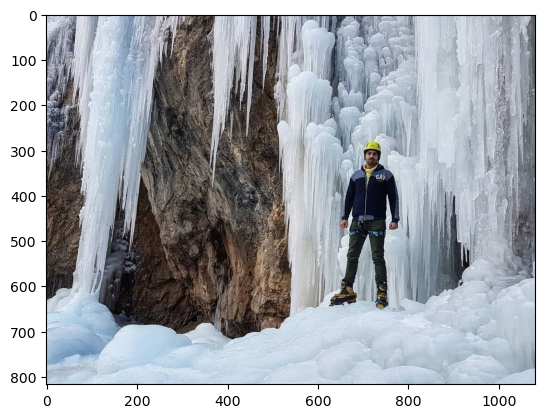

In [7]:
# reading the sample image from a url
image = io.imread('https://farrokhkarimi.github.io/images/gallery/modals/ice-m.jpg')
plt.imshow(image)
plt.show()

In [8]:
# saving the image on the disk
io.imsave('image.jpg', image)

# loading the image from the disk
image = cv2.imread('image.jpg')

plt.imshow(image)
plt.show()

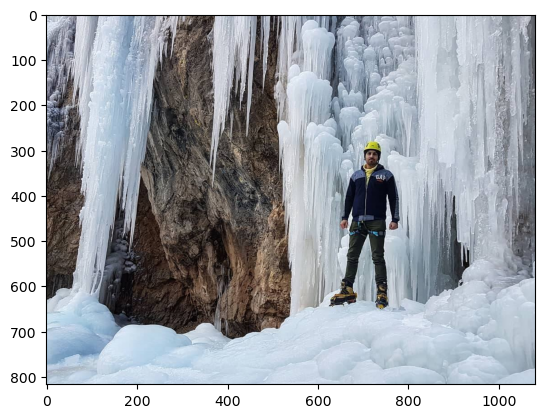

In [9]:
# plt.imshow(img) shown an image with wrong colorspace. we should correct the colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [10]:
# listing the folders and files in the current directory using unix command
!ls

"ls" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


# Basic Operations on Images

In [11]:
messi5 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true')
messi = messi5.copy()
plt.imshow(messi)
plt.show()

In [12]:
# accessing and modifying pixel values
px = messi[100,100]
print("Before:", px)
messi[100,100] = [255,255,255]
print("After:",messi[100,100])

Before: [200 166 156]
After: [255 255 255]


In [13]:
# changing pixel values
for i in range(5):
    for j in range(5):
        messi[50+i, 235+j] = (0, 255, 0)

plt.imshow(messi)

In [14]:
# accessing image properties
print(messi.shape)
print(messi.size)
print(messi.dtype)

(342, 548, 3)
562248
uint8


In [15]:
# image ROI
ball = messi[280:340, 330:390]
messi[273:333, 100:160] = ball

plt.imshow(messi)

In [16]:
# splitting and merging image channels
b,g,r = cv2.split(messi)

messi = cv2.merge((b,g,r))

print(r)

[[39 42 44 ... 59 57 54]
 [37 42 46 ... 62 60 57]
 [42 47 51 ... 64 63 60]
 ...
 [56 48 49 ... 60 63 74]
 [52 59 50 ... 56 69 66]
 [43 58 72 ... 49 50 51]]


In [17]:
# set all the red pixles to zero using numpy indexing
messi[:,:,2] = 0

plt.imshow(messi)

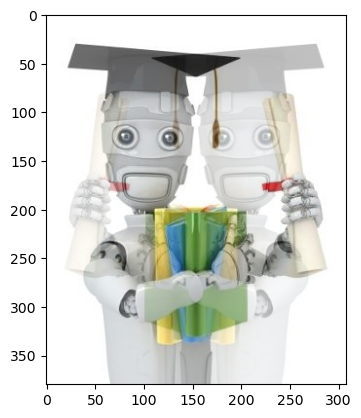

In [19]:
# image addition --> Alpha Compositing
img1 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/ml.png?raw=true')
img2 = cv2.flip(img1, 1)

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

plt.imshow(dst)

# Geometric Transformations of Images

In [20]:
messi = messi5.copy()
plt.imshow(messi)
plt.show()

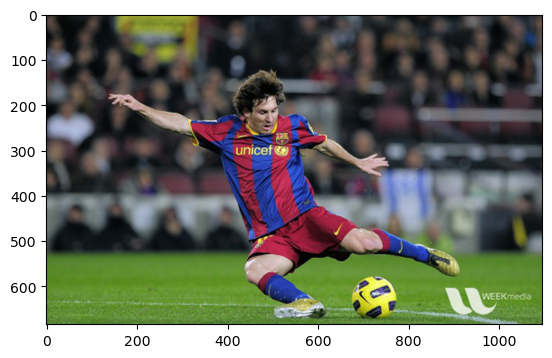

In [21]:
# Scaling
res = cv2.resize(messi,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

In [22]:
rows,cols,ch = messi.shape

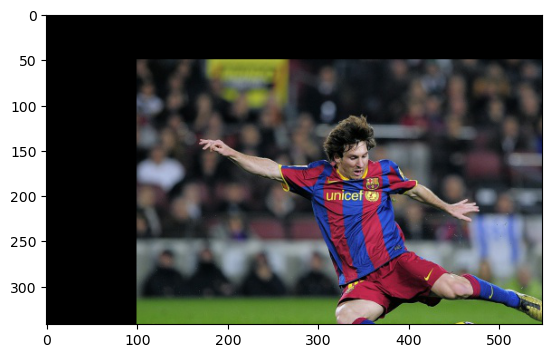

In [23]:
# Translation
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(dst)

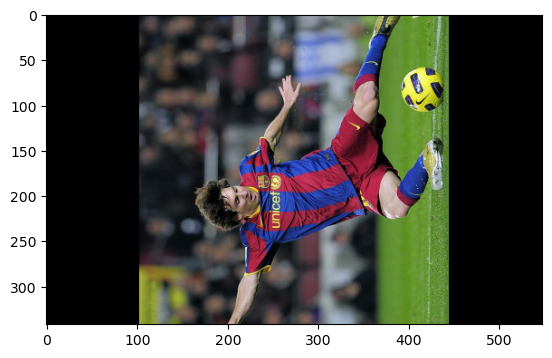

In [24]:
# Rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(dst)

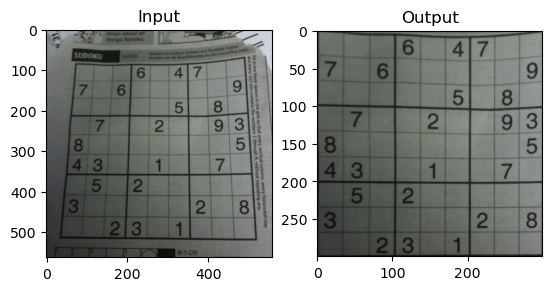

In [25]:
# Perspective Transformation
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png?raw=true')
rows,cols,ch = img.shape
pts1 = np.float32([[73,86],[489,69],[36,514],[520,522]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Image Thresholding

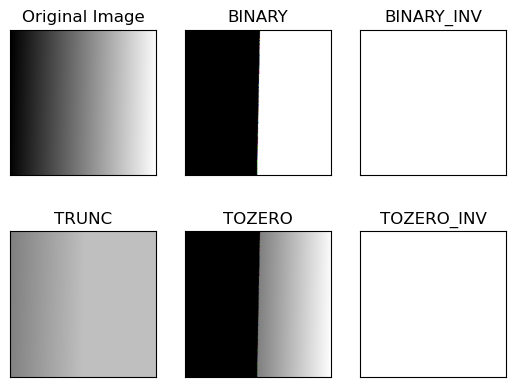

In [26]:
# Simple Thresholding
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/gradient.png?raw=true')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

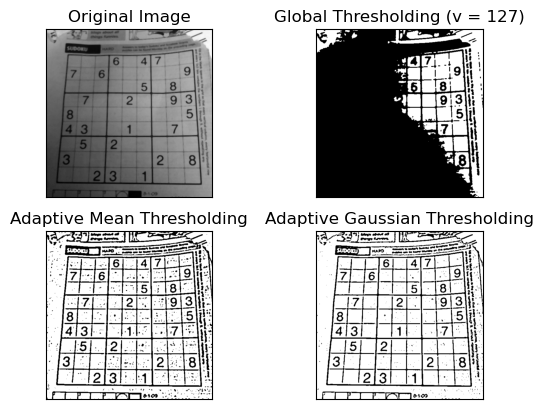

In [27]:
# Adaptive Thresholding
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png?raw=true')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Smoothing Images with Filters!

Ref: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

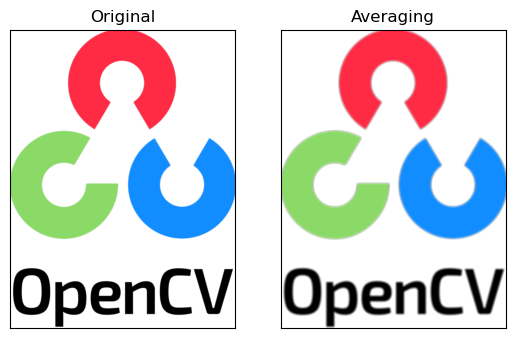

In [28]:
# 2D Convolution ( Image Filtering )
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/opencv-logo.png?raw=true')

kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

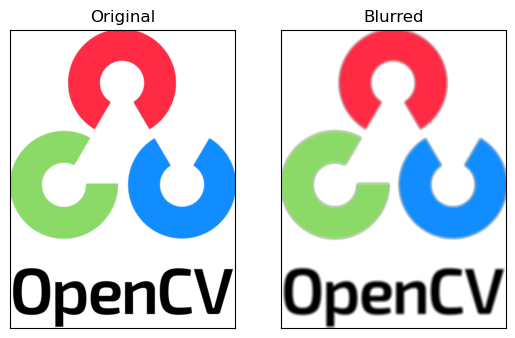

In [29]:
# Image Blurring (Image Smoothing)
blur = cv2.blur(img,(9,9))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

You can use the other kernels to smoothing your image:

```python
# Gaussian Filtering
blur = cv2.GaussianBlur(img,(5,5),0)

# Median Filtering (highly effective in removing salt-and-pepper noise)
median = cv2.medianBlur(img,5)

# Bilateral Filtering
blur = cv2.bilateralFilter(img,9,75,75)
```

# Edge Detection

Ref: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

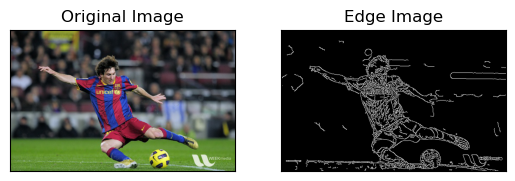

In [30]:
# Canny Edge Detection

edges = cv2.Canny(messi,100,200)

plt.subplot(121),plt.imshow(messi,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Contours

Ref: https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html

In [31]:
# finding contours
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

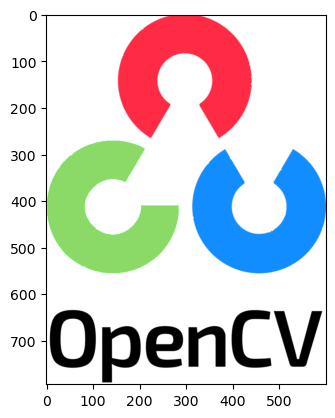

In [32]:
# drawing contours
img2 = img.copy()
cv2.drawContours(img2, contours, -1, (0,255,0), 3)

plt.imshow(img2)

# Histograms

Ref: https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html

You can use OpenCV or numpy to calculate Histogram. Here we use numpy for Histogram calculation.

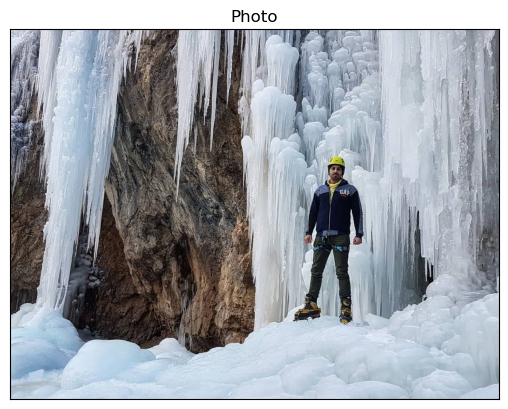

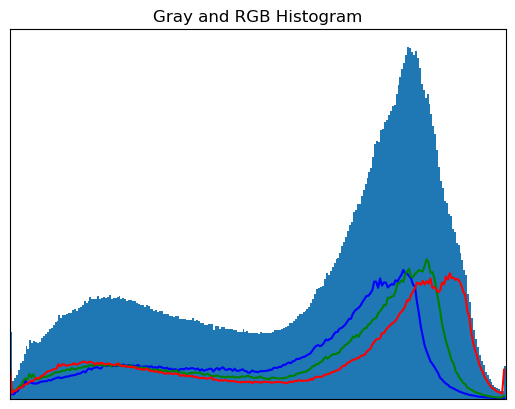

In [33]:
img = image.copy()

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

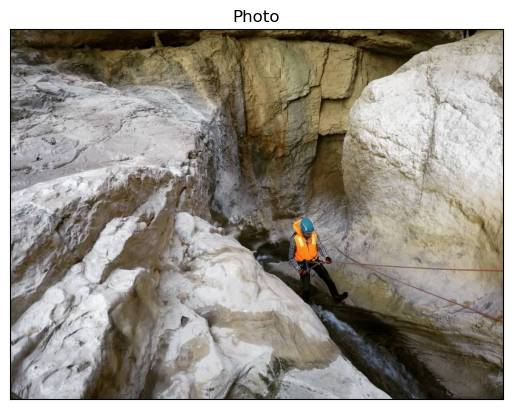

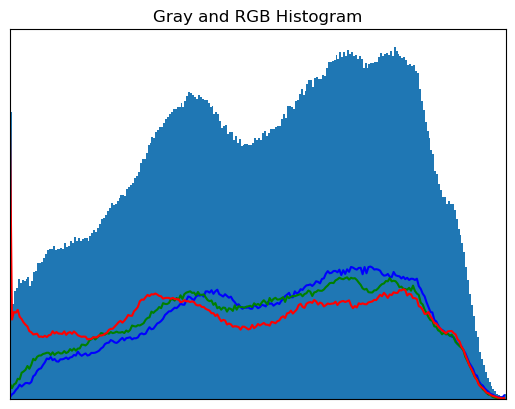

In [34]:
img = io.imread('https://farrokhkarimi.github.io/images/gallery/modals/canyon-m.jpg')

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Filters visualizations

Why Laplacian is a High Pass Filter?
Why we need fourier transforms?

- A high-pass filter allows high-frequency signals to pass through while attenuating low-frequency signals.

- In an image, high frequencies are associated with sudden changes in pixel intensity, such as edges, textures, or fine details.

- The Laplacian operator is a second-order derivative filter, which means it measures the rate at which the first derivative (the gradient) changes. 

- In simple terms, it detects areas where intensity values change rapidly (high-frequency content).

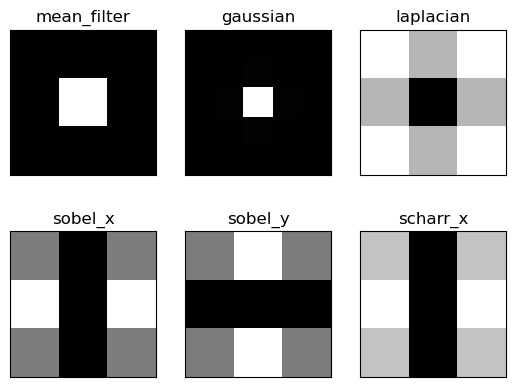

In [35]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

# Template Matching

Ref: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

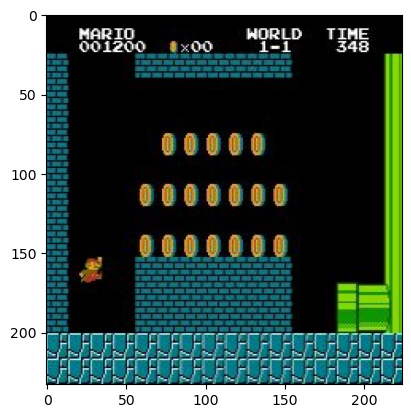

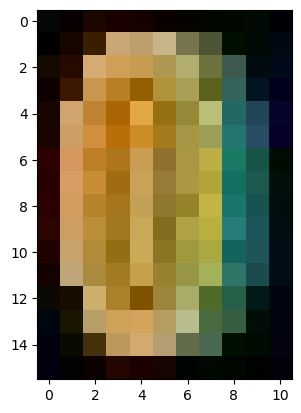

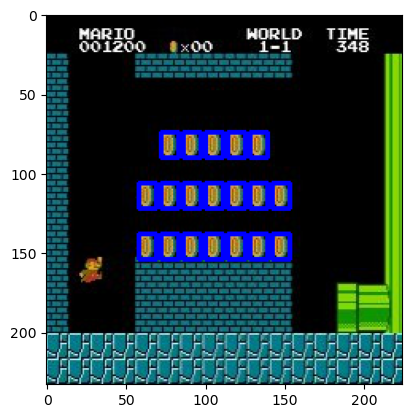

In [36]:
img = io.imread('https://github.com/farrokhkarimi/OpenCV/blob/master/images/mario.jpg?raw=true')
plt.imshow(img)
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# croping the template from the main image
template = img[74:90,72:83]
plt.imshow(template)
plt.show()
template_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
ch, w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template_gray,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
res = img.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(res, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(res)

# Feature Matching

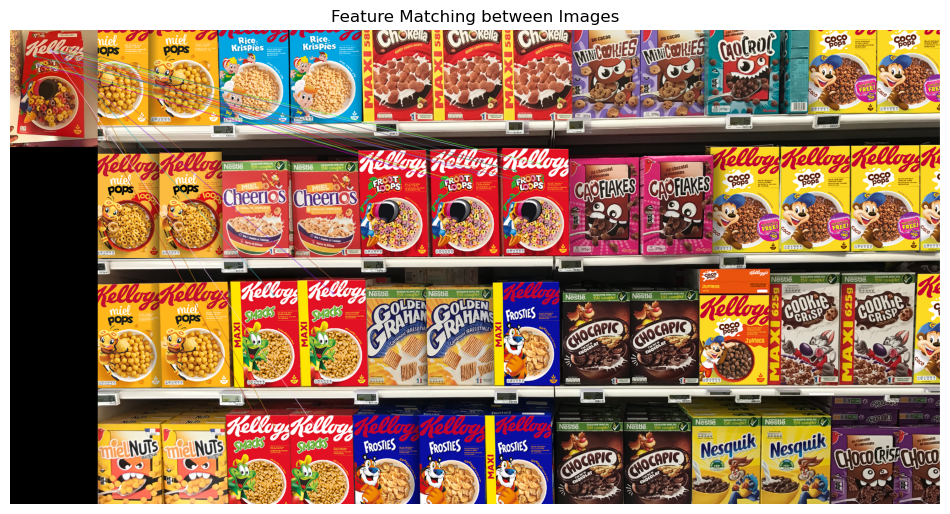

In [24]:
# Load the two images

# img1 = io.imread('https://github.com/farrokhkarimi/OpenCV/blob/master/images/mario.jpg?raw=true')
# img2 = io.imread('https://github.com/farrokhkarimi/OpenCV/blob/master/images/mario.jpg?raw=true')

# img1 = cv2.imread('./images\\featurematching1.png')
# img2 = cv2.imread('./images\\featurematching2.png')

img1 = io.imread("https://github.com/lorenzo-stacchio/Deep-Learning-and-Computer-Vision-for-Business/blob/main/02-Pytorch%20and%20CV/images/featurematching1.png?raw=true")
img2 = io.imread("https://github.com/lorenzo-stacchio/Deep-Learning-and-Computer-Vision-for-Business/blob/main/02-Pytorch%20and%20CV/images/featurematching2.png?raw=true")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# plt.imshow(img1)
# plt.imshow(img2)

# plt.show()
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create()

## Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(img_gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img_gray2, None)

# Initialize the BFMatcher for matching descriptors between two images
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between the two images
matches = bf.match(descriptors1, descriptors2)

# Sort the matches based on distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 20 matches
matched_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched image
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Feature Matching between Images")
plt.axis("off")
plt.show()

# Hough Transforms

Hough Line Transform Ref: https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html

Hough Circle Transform Ref: https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

# Understanding Features

Ref: https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

# Depth Map from Stereo Images

Ref: https://docs.opencv.org/4.x/dd/d53/tutorial_py_depthmap.html

Author : [https://farrokhkarimi.github.io/](https://farrokhkarimi.github.io/)  
Reference : [opencv.org](https://opencv.org/)